In [1]:
%env CUDA_VISIBLE_DEVICES=2

import json
from IPython.core.display import Image, display

with open('/home/xilini/par-gen/01-par-gen/data/dataset_paragraphs_v1.json', 'r') as p:
    paragraphs = json.load(p)['images']
    
val_paragraphs = [elem for elem in paragraphs if elem['split'] == 'test']

env: CUDA_VISIBLE_DEVICES=2


In [2]:
def show_image(image_id):
    vis_data_basepath = '/home/xilini/vis-data/'
    filename = str(image_id) + '.jpg'
    print(filename)
    for item in val_paragraphs:
        if filename == item['filename']:
            return vis_data_basepath + item['filepath'] + '/' + item['filename']
    return 'Not Found'

In [42]:
!python generate.py

SentenceRNN(
  (non_lin): ReLU()
  (attention): Attention(
    (hidden_mapping): Linear(in_features=512, out_features=512, bias=True)
    (tanh): Tanh()
    (softmax): Softmax(dim=1)
    (vision_mapping): Linear(in_features=4096, out_features=512, bias=True)
    (language_mapping): Linear(in_features=512, out_features=512, bias=True)
    (vision_full_att): Linear(in_features=512, out_features=1, bias=True)
    (language_full_att): Linear(in_features=512, out_features=1, bias=True)
    (linear_att): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (sentence_rnn): LSTMCell(1536, 512)
  (f_beta): Linear(in_features=512, out_features=1536, bias=True)
  (sigmoid): Sigmoid()
)
WordRNN(
  (decode_step): LSTM(512, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=7606, bias=True)
  (embeddings): Embedding(7606, 512)
)
0
BLEU 1 0.4706522287315717
BLEU 2 0.27665723292890093
BLEU 3 0.172890680146728
BLEU 4 0.10485989556244531
CIDER 1.7924517715964416
METEOR 0.184

2356347.jpg


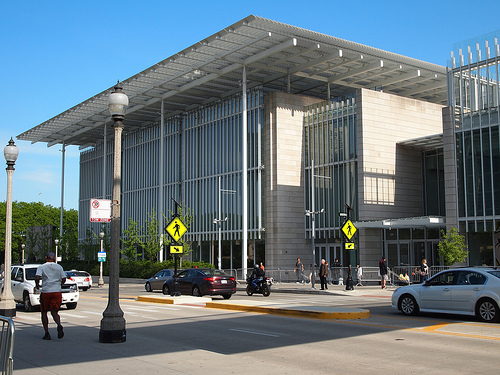

REF	 a large building with bars on the windows in front of it. there is people walking in front of the building. there is a street in front of the building with many cars on it.
HYP	 a man is walking on the sidewalk. there is a building behind the man. there is a building in the background.

2414610.jpg


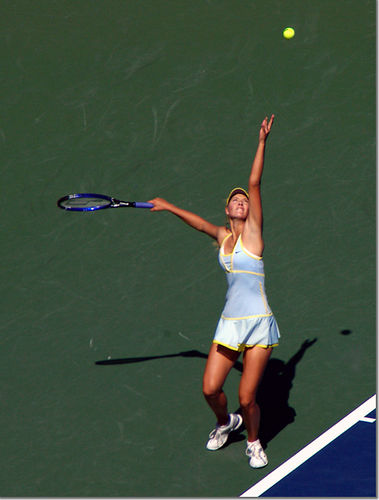

REF	 a woman in a blue tennis outfit stands on a green tennis court. she is swinging a blue tennis racket. there is a green tennis ball above her head.
HYP	 a woman is playing tennis on a tennis court. she is holding a tennis racket in her hand. she is holding a tennis racket in her hand.

2388203.jpg


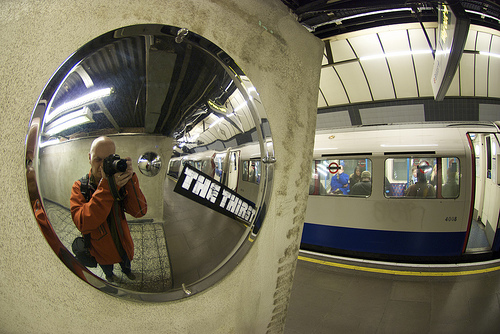

REF	 the man is taking a photo in the round mirror. he is bald. he is wearing an orange jacket. his camera is black. there is a train in the mirror too.
HYP	 a train is sitting on the tracks. there is a train on the side of the train. the man is wearing a blue jacket. the man is wearing black pants. the man is wearing a black shirt.



In [43]:
with open('./scores/VIS_LANG_COMBINATION-beam_2_cidertest.json', 'r') as j:
    generated_pars = json.load(j)
        
for i in generated_pars:
    display(Image(show_image(i['image_id']),
                  width=300, unconfined=False))
    print('REF\t', i['references'])
    print('HYP\t', i['hypotheses'])
    print()    
#display(Image(show_image(2414564), width=500, unconfined=False))